In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.insert(0, os.path.abspath('../src'))

from models.ou import OrnsteinUhlenbeck

plt.style.use('seaborn-v0_8-darkgrid')
print("Setup complete.")

Setup complete.


In [34]:
ou_params = {
    'X0': 90,      # Start value
    'mu': 100,     # Long-term mean
    'theta': 5.0,  # Reversion speed
    'sigma': 5.0   # Volatility
}

ou_model = OrnsteinUhlenbeck(**ou_params)
print(f"Model created: {ou_model}")

# Simulation settings
T = 2.0       # 2 years
dt = 1/252    # Daily steps
n_paths = 3

sim_paths = ou_model.simulate(T, dt, n_paths)

print(f"Path array shape: {sim_paths.shape}")

Model created: OrnsteinUhlenbeck({'X0': 90, 'mu': 100, 'theta': 5.0, 'sigma': 5.0})
Path array shape: (505, 3)


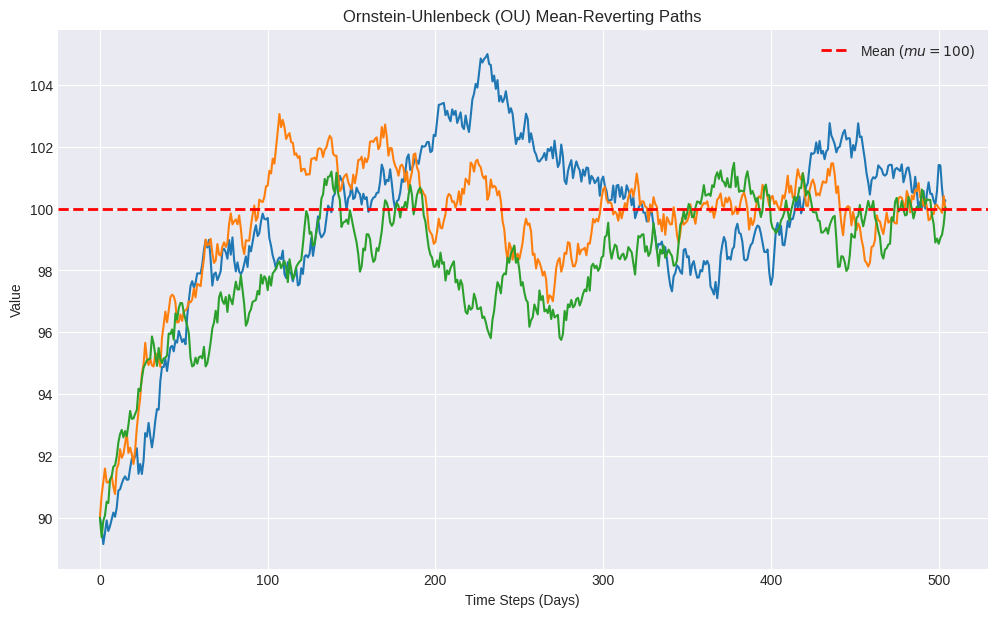

In [35]:
plt.figure(figsize=(12, 7))

plt.plot(sim_paths)

# Plot the long-term mean
plt.axhline(
    ou_params['mu'], 
    color='red', 
    linestyle='--', 
    linewidth=2.0, 
    label=f"Mean ($mu={ou_params['mu']}$)"
)

plt.title("Ornstein-Uhlenbeck (OU) Mean-Reverting Paths")
plt.xlabel("Time Steps (Days)")
plt.ylabel("Value")
plt.legend()
plt.show()

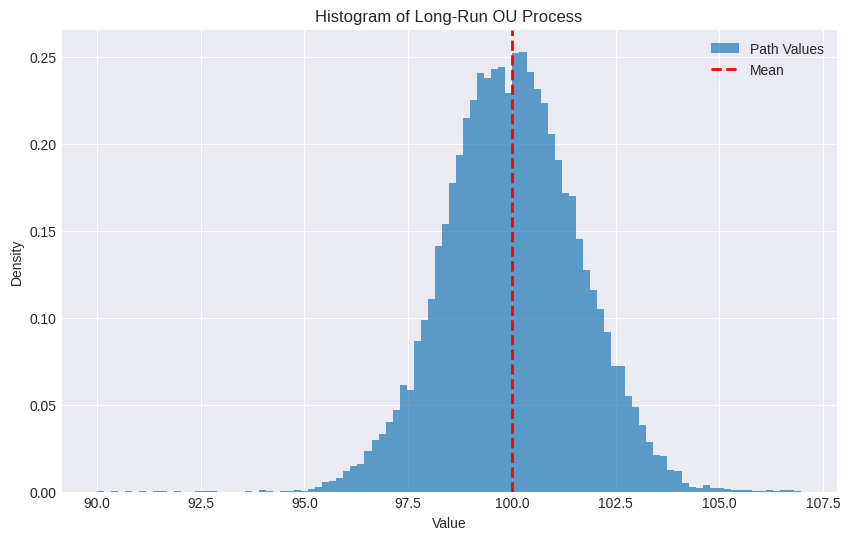

In [36]:
# Validation - Check the distribution of values
# If we simulate for long enough, the distribution of
# values should be normal, centered around the mean 'mu'.

# single, very long simulation
T_long = 100
dt_long = 1/252 # Weekly steps
long_path = ou_model.simulate(T_long, dt_long, n_paths=1)

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(long_path, bins=100, density=True, alpha=0.7, label="Path Values")

# Plot a vertical line at the mean
plt.axvline(ou_params['mu'], color='red', linestyle='--', linewidth=2.0, label="Mean")

plt.title("Histogram of Long-Run OU Process")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()